# Evolución de la serie de afiliados durante la crisis 2008-2013

In [59]:
# Importamos librerías
import warnings
warnings.filterwarnings('ignore')
import os
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose, STL
from statsmodels.tsa.x13 import x13_arima_analysis
plt.style.use('seaborn')
pd.set_option('display.max_row', 50)
pd.set_option('display.max_columns', 30)

In [60]:
# Para expresar decimales con coma (no funciona en Google Colab)
# Locale settings
import locale
# Set to Spain locale to get comma decimal separater
locale.setlocale(locale.LC_ALL, "es_ES")
# Tell matplotlib to use the locale we set above
plt.rcParams['axes.formatter.use_locale'] = True

In [61]:
# Cargamos y procesamos los datos
file=r'C:\Users\danie\Dropbox\ECO\TEACHING\2021-2022\CyP\T3\Tarea1_SS\Serie+Afiliados+Medios+por+Regímenes+2001-octubre+2021.xlsx'
ss=pd.read_excel(file)
ss=ss[["Datos totales de afiliados Medios en alta por Regímenes","Unnamed: 13"]]
ss.rename(columns={"Datos totales de afiliados Medios en alta por Regímenes":"periodo","Unnamed: 13":"afiliados"},inplace=True)
ss=ss[2:]
ss.dropna(inplace=True)
ss['mes']=ss.periodo.str[:-5].str.strip()
meses={"Enero":"01","Febrero":"02","Marzo":"03","Abril":"04","Mayo":"05","Junio":"06",
       "Julio":"07","Agosto":"08","Septiembre":"09","Octubre":"10","Noviembre":"11","Diciembre":"12"}
ss['mes']=ss.mes.map(meses)
ss["periodo"]=ss.periodo.str[-4:]+"-"+ss.mes
ss.set_index("periodo",inplace=True)
ss.index = pd.to_datetime(ss.index)
ss['afiliados']=ss['afiliados']/1000000 # Lo expresamos en millones (mejor para el gráfico luego)

### Evolución de la afiliación a la Seguridad Social

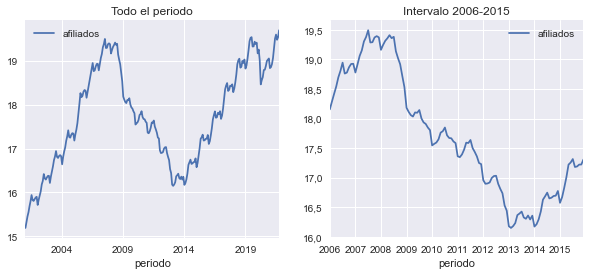

In [62]:
fix,ax=plt.subplots(1,2, figsize=(10,4))
ss.plot(ax=ax[0],title="Todo el periodo")
ss2006=ss.loc["2006":"2015"] # Seleccionamos el periodo relevante
ss2006.plot(ax=ax[1],title="Intervalo 2006-2015")
plt.show()

### ¿Cuándo tocó fondo la serie de afiliados a la Seguridad Social durante la crisis?

##### Serie bruta

In [63]:
print("La serie bruta de afiliados a la SS tocó fondo en el mes/año:",
      ss2006[ss2006.afiliados==ss2006.afiliados.min()].index[0].strftime("%m/%Y"))

La serie bruta de afiliados a la SS tocó fondo en el mes/año: 02/2013


##### Serie desestacionalizada (descomposición clásica)

In [64]:
# Descomposición clásica aditiva
ss_ad = seasonal_decompose(ss.afiliados, model="additive")
ss_ad2006=ss.afiliados["2006":]-ss_ad.seasonal["2006":]
print("La serie ajustada por estacionalidad de afiliados a la SS tocó fondo en el mes/año:",
      ss_ad2006[ss_ad2006==ss_ad2006.min()].index[0].strftime("%m/%Y"))

La serie ajustada por estacionalidad de afiliados a la SS tocó fondo en el mes/año: 07/2013


##### Serie desestacionalizada (método STL)

In [65]:
# Descomposición STL
ss_stl = STL(ss.afiliados,seasonal=13).fit()
ss_stl2006=ss.afiliados["2006":]-ss_stl.seasonal["2006":]
print("La serie ajustada por estacionalidad de afiliados a la SS tocó fondo en el mes/año:",
      ss_stl2006[ss_stl2006==ss_stl2006.min()].index[0].strftime("%m/%Y"))

La serie ajustada por estacionalidad de afiliados a la SS tocó fondo en el mes/año: 07/2013


##### Serie desestacionalizada (método X13ARIMA-SEATS)

In [66]:
# Descomposición x13-ARIMA-SEATS
XPATH=os.chdir(r"C:/WinX13/x13as")
ss_x13 = x13_arima_analysis(endog = ss.afiliados,x12path=XPATH,trading=True)
ss_x132006=ss_x13.seasadj["2006":]
print("La serie ajustada por estacionalidad de afiliados a la SS tocó fondo en el mes/año:",
      ss_x132006[ss_x132006==ss_x132006.min()].index[0].strftime("%m/%Y"))

La serie ajustada por estacionalidad de afiliados a la SS tocó fondo en el mes/año: 07/2013


#### Representación gráfica 

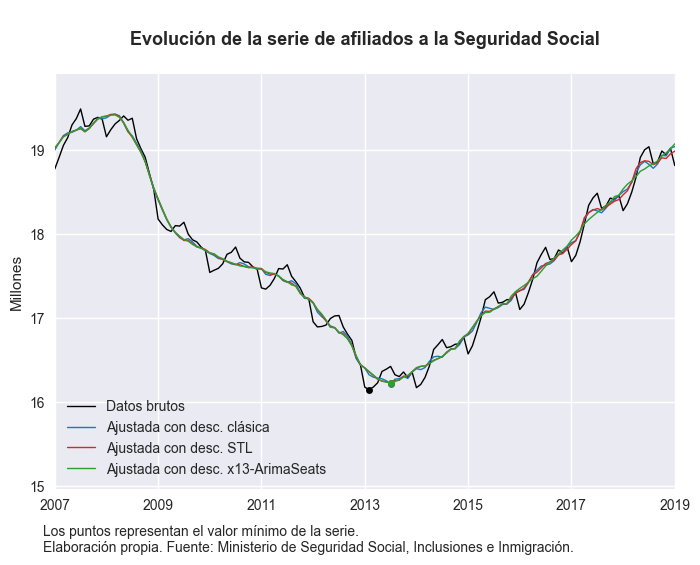

In [67]:
# Gráfico conjunto con buen formato
fig,ax=plt.subplots(dpi=100)
# Serie bruta
ss.afiliados.plot(color="black",linewidth=1,ax=ax,label="Datos brutos")
ss2006.afiliados[ss2006.afiliados==ss2006.afiliados.min()].plot(marker="o", markerfacecolor="black", markersize=5, ax=ax, label="")
# Desestacionalización clásica aditiva
ss_ad2006.plot(color="tab:blue",linewidth=1,ax=ax, label="Ajustada con desc. clásica")
ss_ad2006[ss_ad2006==ss_ad2006.min()].plot(marker="o", markerfacecolor="tab:blue", markersize=5, ax=ax, label="")
# Desestacionalización STL
ss_stl2006.plot(color="tab:red",linewidth=1,ax=ax, label="Ajustada con desc. STL")
ss_stl2006[ss_stl2006==ss_stl2006.min()].plot(marker="o", markerfacecolor="tab:red", markersize=5, ax=ax, label="")
# Desestacionalización X13-ARIMA-SEATS
ss_x132006.plot(color="tab:green",linewidth=1,ax=ax, label="Ajustada con desc. x13-ArimaSeats")
ss_x132006[ss_x132006==ss_x132006.min()].plot(marker="o", markerfacecolor="tab:green", markersize=5, ax=ax, label="")
# Otros parámetros del gráfico
ax.legend()
ax.set_xlim("2007-01","2019-01")
ax.set_ylabel("Millones")
ax.set_xlabel("")
ax.set_title("\n Evolución de la serie de afiliados a la Seguridad Social \n", size=13, fontweight='bold')
fig.text(0.11, 0.01, "Los puntos representan el valor mínimo de la serie.\nElaboración propia. Fuente: Ministerio de Seguridad Social, Inclusiones e Inmigración.")
plt.show()

### ¿Cuáles son los meses con mayor y menor afiliaciones por motivos estacionales?

#### Descomposición clásica aditiva

In [68]:
aditiva=ss_ad.seasonal.to_frame()
aditiva['mes']=pd.DatetimeIndex(aditiva.index).month
meses2={1:"Enero",2:"Febrero",3:"Marzo",4:"Abril",5:"Mayo",6:"Junio",
       7:"Julio",8:"Agosto",9:"Septiembre",10:"Octubre",11:"Noviembre",12:"Diciembre"}
aditiva['nombre_mes']=aditiva.mes.map(meses2)
aditiva=aditiva.groupby(by='nombre_mes').mean() 
# No es necesario calcular la media porque siempre es igual el seasonal
MIN=aditiva[aditiva.seasonal==aditiva.seasonal.min()]
MAX=aditiva[aditiva.seasonal==aditiva.seasonal.max()]
DIF= MAX.reset_index().seasonal-MIN.reset_index().seasonal
print("El mes con mayor número de afiliaciones cada año es:",
      MAX.index[0])
print("El mes con menor número de afiliaciones cada año es:",
      MIN.index[0])
print("La diferencia de afiliaciones estacional entre el mes con más y menos afiliados es", int((DIF.get(0)*1000).round(0)),"mil.")

El mes con mayor número de afiliaciones cada año es: Julio
El mes con menor número de afiliaciones cada año es: Enero
La diferencia de afiliaciones estacional entre el mes con más y menos afiliados es 436 mil.


#### Descomposición STL

In [69]:
LR=ss_stl.seasonal.to_frame()
LR['mes']=pd.DatetimeIndex(LR.index).month
meses2={1:"Enero",2:"Febrero",3:"Marzo",4:"Abril",5:"Mayo",6:"Junio",
       7:"Julio",8:"Agosto",9:"Septiembre",10:"Octubre",11:"Noviembre",12:"Diciembre"}
LR['nombre_mes']=LR.mes.map(meses2)
LR=LR.groupby(by='nombre_mes').mean()
MIN=LR[LR.season==LR.season.min()]
MAX=LR[LR.season==LR.season.max()]
DIF= MAX.reset_index().season-MIN.reset_index().season
print("El mes con mayor número de afiliaciones cada año es:",
      MAX.index[0])
print("El mes con menor número de afiliaciones cada año es:",
      MIN.index[0])
print("La diferencia de afiliaciones estacional entre el mes con más y menos afiliados es", int((DIF.get(0)*1000).round(0)),"mil.")

El mes con mayor número de afiliaciones cada año es: Julio
El mes con menor número de afiliaciones cada año es: Enero
La diferencia de afiliaciones estacional entre el mes con más y menos afiliados es 434 mil.


##### Serie desestacionalizada (método X13ARIMA-SEATS)

In [70]:
x13=ss.afiliados-ss_x13.seasadj
x13=x13.to_frame()
x13.rename(columns={0:"valor"}, inplace=True)
x13['mes']=pd.DatetimeIndex(x13.index).month
meses2={1:"Enero",2:"Febrero",3:"Marzo",4:"Abril",5:"Mayo",6:"Junio",
       7:"Julio",8:"Agosto",9:"Septiembre",10:"Octubre",11:"Noviembre",12:"Diciembre"}
x13['nombre_mes']=x13.mes.map(meses2)
x13["valor"]=x13["valor"].astype("float32") # Da error por el tipo de campo si no lo pongo como float
x13=x13[["valor","nombre_mes"]].groupby(by='nombre_mes').mean()
MIN=x13[x13.valor==x13.valor.min()]
MAX=x13[x13.valor==x13.valor.max()]
DIF= MAX.reset_index().valor-MIN.reset_index().valor
print("El mes con mayor número de afiliaciones cada año es:",
      MAX.index[0])
print("El mes con menor número de afiliaciones cada año es:",
      MIN.index[0])
print("La diferencia de afiliaciones estacional entre el mes con más y menos afiliados es", int((DIF.get(0)*1000).round(0)),"mil.")

El mes con mayor número de afiliaciones cada año es: Julio
El mes con menor número de afiliaciones cada año es: Enero
La diferencia de afiliaciones estacional entre el mes con más y menos afiliados es 467 mil.


In [71]:
# Última celda del notebook
# 1. Guardar esta última versión que acaba de ejecutarse
from IPython.display import display, Javascript
display(Javascript('IPython.notebook.save_checkpoint();'))
# 2. Producir el informe en versión HTML
import os
os.chdir(r"C:\Users\danie\CyP")
os.system("jupyter nbconvert Tema3_Tarea1.ipynb --to html --no-input --no-prompt ")

<IPython.core.display.Javascript object>

0